This notebook is meant to be used as a demo for DataSpell. Imagine you are a student working on a group project. You and your partner are interested in predicting used car prices used regression. You realize that effective pricing strategies can help any company efficiently sel its products in a competitive market.
You want to first estimate the price of used cars by taking into account a set of features, based on historical data. Second, we want to get a better understanding of the most relevant features that help determine the price of a used vehicle. You are tasked with the EDA portoin of t

In [70]:
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('vehicles.csv')
df
#adding some more things
#Adding some more things to make a different commit messgae!?

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [72]:
df.shape

(426880, 26)

In [73]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [74]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [75]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,426880.000000,426880.000000,425675.000000,422480.000000,0.000000,420331.000000,420331.000000
mean,7311486634.224333,75199.033187,2011.235191,98043.331443,nan,38.493940,-94.748599
std,4473170.412559,12182282.173604,9.452120,213881.500798,nan,5.841533,18.365462
min,7207408119.000000,0.000000,1900.000000,0.000000,nan,-84.122245,-159.827728
25%,7308143339.250000,5900.000000,2008.000000,37704.000000,nan,34.601900,-111.939847
50%,7312620821.000000,13950.000000,2013.000000,85548.000000,nan,39.150100,-88.432600
75%,7315253543.500000,26485.750000,2017.000000,133542.500000,nan,42.398900,-80.832039
max,7317101084.000000,3736928711.000000,2022.000000,10000000.000000,nan,82.390818,173.885502


In [76]:
df.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [77]:
# Reclassify condition column
def clean_condition(row):

    good = ['good','fair']
    excellent = ['excellent','like new']

    if row.condition in good:
        return 'good'
    if row.condition in excellent:
        return 'excellent'
    return row.condition

# Clean dataframe
def clean_df(dataframe):
    cleaned_df = df.copy()
    cleaned_df['condition'] = cleaned_df.apply(lambda row: clean_condition(row), axis=1)
    return cleaned_df

# Get df with reclassified 'condition' column

df_cleaned = clean_df(df)
print(df_cleaned.condition.unique())

[nan 'good' 'excellent' 'new' 'salvage']


In [78]:
df_cleaned = df_cleaned.copy().drop(['url','image_url','region_url'], axis=1)
df_cleaned
#Remove city url, it's region url!

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,...,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,...,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,...,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,...,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [79]:
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_pass

df_cleaned = df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [81]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,364076.000000,364076.000000,364076.000000,364076.000000,360715.000000,360715.000000
mean,7311452510.716609,19435.218990,2012.309262,94376.099759,38.516665,-94.138671
std,4391458.441977,14248.973882,5.747604,66759.644660,5.849388,18.048492
min,7301583321.000000,1000.000000,1991.000000,0.000000,-84.122245,-159.719900
25%,7308050685.750000,7995.000000,2009.000000,39082.000000,34.724400,-110.170000
50%,7312519079.500000,15995.000000,2013.000000,88942.000000,39.254962,-87.871739
75%,7315227796.500000,27991.000000,2017.000000,137000.000000,42.356988,-80.759936
max,7317101084.000000,99999.000000,2022.000000,898163.000000,82.252826,167.629911


In [82]:
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(120453, 19)

<AxesSubplot:>

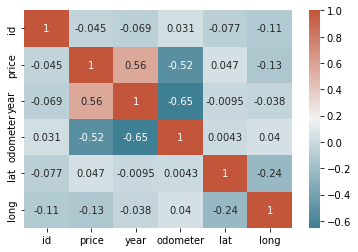

In [83]:
# calculate correlation matrix
import seaborn as sns
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='odometer', ylabel='price'>

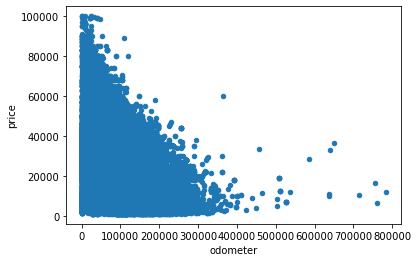

In [84]:
import matplotlib as mlt
df_cleaned.plot(kind='scatter', x='odometer', y='price')

<AxesSubplot:xlabel='year', ylabel='price'>

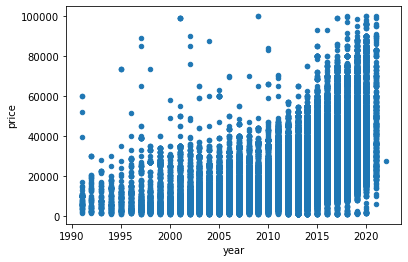

In [85]:
df_cleaned.plot(kind='scatter', x='year', y='price')

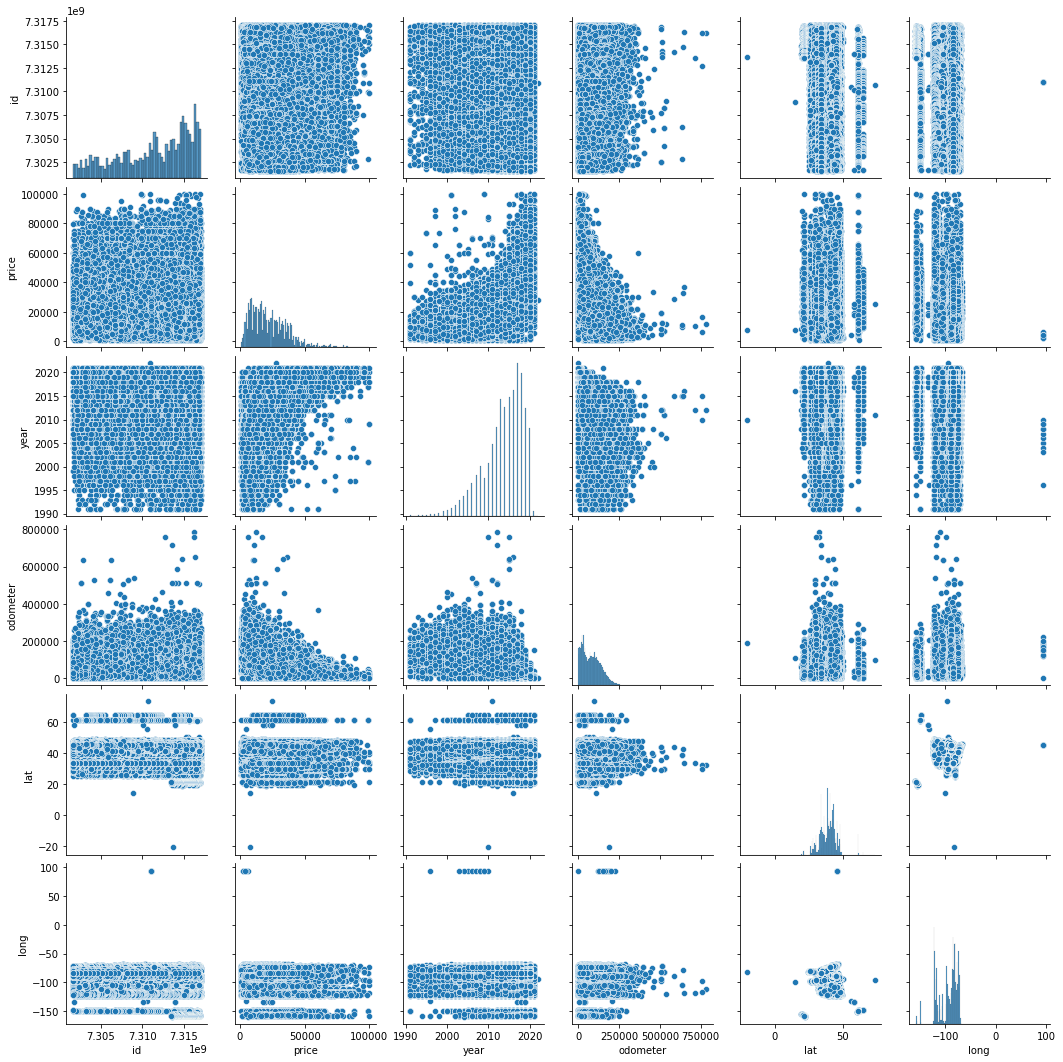

In [86]:
sns.pairplot(df_cleaned)

<AxesSubplot:ylabel='Frequency'>

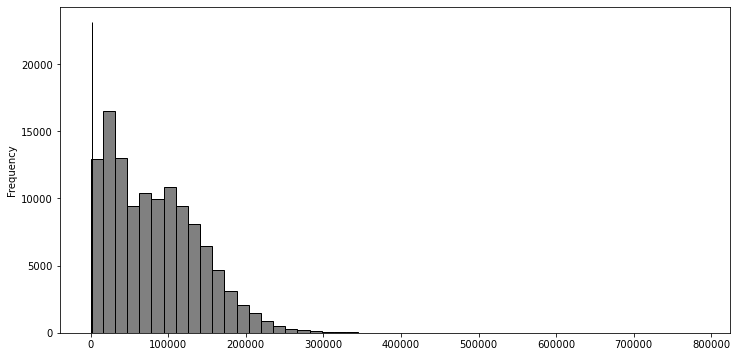

In [88]:
df_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

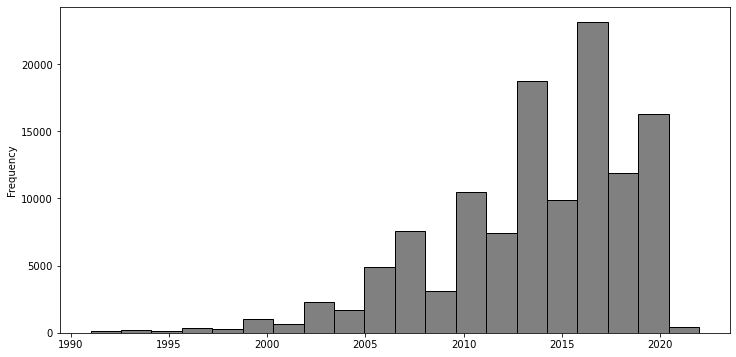

In [89]:
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

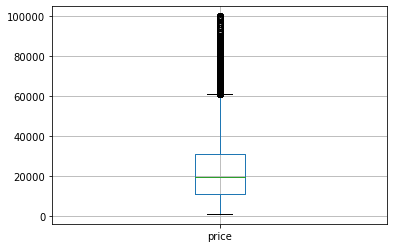

In [90]:
df_cleaned.boxplot('price')